In [8]:
# import neccessary stuff 
#run this from the datascience-films folder
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from pathlib import Path
import openpyxl

RESOURCE_PATH = Path('../cleaned_data')

df= pd.read_csv(RESOURCE_PATH / 'Export_historical_vietnam_v2_labeled.csv',sep=',')

In [9]:
#extract historical event and target
df = df.join(df.pop('historical_event').str.join(sep='').str.get_dummies().astype(bool))
df['numVotes'] = df['numVotes'].fillna(0)
#lastly pop our target we want
# df['target'] = list(zip(df.movie_release_year, df.averageRating))
target = df[['movie_release_year','averageRating']]
target.averageRating=  target.averageRating.fillna(1)

In [10]:
numeric_feature_names = ['genre_label','numVotes','averageRating']
numeric_features = df[numeric_feature_names]
numeric_features['numVotes'] = numeric_features['numVotes'].fillna(0)
numeric_features['numVotes'] = numeric_features['numVotes'].astype(np.int64)
numeric_features['genre_label'] = numeric_features['genre_label'].fillna(0)
numeric_features['genre_label'] = numeric_features['genre_label'].astype(np.int64)

/tmp/ipykernel_2905/2041894309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['numVotes'] = numeric_features['numVotes'].fillna(0)
/tmp/ipykernel_2905/2041894309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['numVotes'] = numeric_features['numVotes'].astype(np.int64)
/tmp/ipykernel_2905/2041894309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

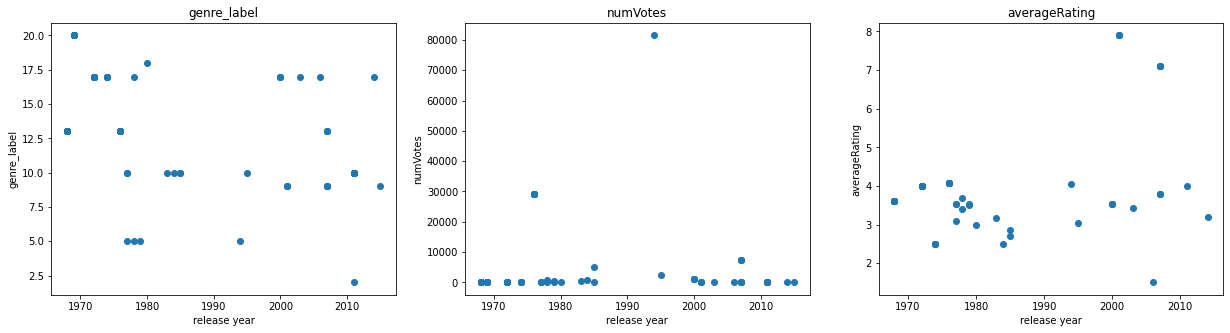

In [11]:
plt.figure(figsize=(21, 5))

target = df['movie_release_year']

for i, col in enumerate(numeric_feature_names):
    plt.subplot(1, len(numeric_feature_names) , i+1)
    x = target 
    y = df[col]
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel( 'release year')
    plt.ylabel(col)
